In [1]:
import h5py
import numpy as np
from rich import print
import h5py
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tU_CV = pd.read_csv('../CV_data/t-U_nCV30.csv')
tUJ_CV = pd.read_csv('../CV_data/t-U-J_nCV30.csv')
tUW_CV = pd.read_csv('../CV_data/t-U-W_nCV30.csv')
tUV_CV = pd.read_csv('../CV_data/t-U-V_nCV30.csv')

In [3]:
tU_CV

,run,para_w_1,loss_loss,nstates_train,nstates_test,state_ind_for_test,train/loss,train/sloss,train/dloss,train/penalty,test/loss,test/sloss,test/dloss,test/penalty,rdmd_params/E0,rdmd_params/t,rdmd_params/U
0,0,0.3,29.730168,29,1,[0],1.025178,0.006341,3.402465,0.164275,0.346816,0.000005,1.156041,27.724540,-0.498079,-0.025312,0.322908
1,1,0.3,29.726298,29,1,[1],1.025045,0.006267,3.402193,0.164953,0.350755,0.000685,1.167584,27.819891,-0.498095,-0.025793,0.322876
2,2,0.3,29.716773,29,1,[2],1.024716,0.006416,3.400749,0.152747,0.360835,0.000005,1.202773,27.773745,-0.497918,-0.025008,0.322315
3,3,0.3,29.715605,29,1,[3],1.024676,0.006414,3.400620,0.152756,0.362004,0.000009,1.206659,27.776464,-0.497919,-0.025020,0.322317
4,4,0.3,29.715606,29,1,[4],1.024676,0.006414,3.400620,0.152756,0.362004,0.000009,1.206659,27.776467,-0.497919,-0.025020,0.322317
5,5,0.3,29.705409,29,1,[5],1.024324,0.006412,3.399454,0.146623,0.372444,0.000203,1.241006,27.871626,-0.497789,-0.024963,0.321811
6,6,0.3,29.410107,29,1,[6],1.014142,0.006395,3.365551,0.023069,0.667762,0.000161,2.225499,31.534746,-0.497877,-0.025092,0.322056
7,7,0.3,29.051764,29,1,[7],1.001785,0.008373,3.319746,0.000000,1.031953,0.000016,3.439807,31.110638,-0.497884,-0.025238,0.328058
8,8,0.3,29.280621,29,1,[8],1.009677,0.008223,3.346403,0.000000,0.801478,0.000155,2.671234,31.261234,-0.497898,-0.025400,0.327772
9,9,0.3,29.280633,29,1,[9],1.009677,0.008223,3.346404,0.000000,0.801466,0.000155,2.671193,31.261235,-0.497898,-0.025400,0.327771


In [4]:
def plot_loss(loss_name:str, model_names, model_files):
    # Should source the model_names from the model_files
    plt.figure(figsize=(4,3), dpi=300, facecolor="white")

    for i, model_name in enumerate(model_names):
        plt.errorbar(model_name, model_files[i][f'train/{loss_name}'].mean(), model_files[i][f'train/{loss_name}'].std(), c='b', label='train' if i ==0  else '', capsize=10.0)
        plt.errorbar(model_name, model_files[i][f'test/{loss_name}'].mean(), model_files[i][f'test/{loss_name}'].std(), c='r', label='test' if i ==0  else '', capsize=5.0)

    plt.legend()

    plt.ylabel(loss_name + ' per state')
    plt.xlabel('model')

In [5]:
def plot_loss_scatter(loss_name:str, model_names, model_files):
    # Should source the model_names from the model_files
    plt.figure(figsize=(4,3), dpi=300, facecolor="white")

    for i, model_name in enumerate(model_names):
        N = len(model_files[i][f'train/{loss_name}'])
        plt.scatter([model_name]*N, model_files[i][f'train/{loss_name}'], c='b', s=30, alpha=0.7, zorder=10)
        plt.scatter([model_name]*N, model_files[i][f'test/{loss_name}'], c='r', marker='s', s=10, alpha=0.7, zorder=10)

        plt.errorbar(model_name, model_files[i][f'train/{loss_name}'].mean(), model_files[i][f'train/{loss_name}'].std(), c='b', label='train' if i ==0  else '', capsize=10.0, zorder=0)
        plt.errorbar(model_name, model_files[i][f'test/{loss_name}'].mean(), model_files[i][f'test/{loss_name}'].std(), c='r', label='test' if i ==0  else '', capsize=5.0, zorder=0)

    plt.legend()

    plt.ylabel(loss_name + ' per state')
    plt.xlabel('model')

In [6]:
def plot_loss_score(loss_name:str, model_names, model_files):
    # Should source the model_names from the model_files
    plt.figure(figsize=(4,3), dpi=300, facecolor="white")

    for i, model_name in enumerate(model_names):
        score = (model_files[i][f'train/{loss_name}']/model_files[i][f'test/{loss_name}'])
        plt.scatter([model_name]*len(score), score, c='b')
        #plt.scatter([model_name]*10, model_files[i][f'test/{loss_name}'], c='r')

    plt.legend()

    plt.ylabel(loss_name+ ' per state SCORE??')
    plt.xlabel('model')

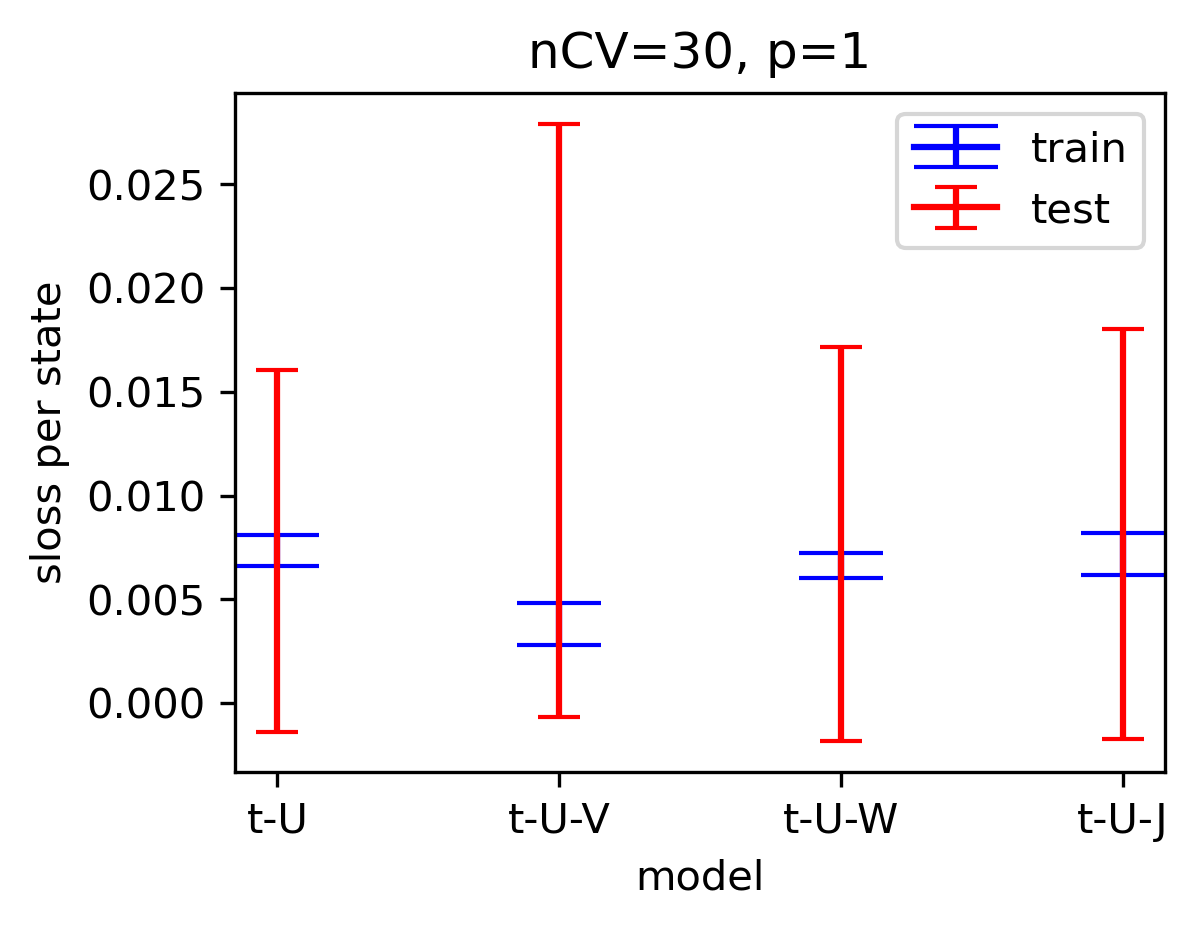

In [7]:
model_names = ['t-U', 't-U-V', 't-U-W', 't-U-J']
model_files = [tU_CV, tUV_CV, tUW_CV, tUJ_CV]

plot_loss('sloss', model_names, model_files)
plt.title('nCV=30, p=1')
plt.savefig("sloss_CV.png", bbox_inches="tight")

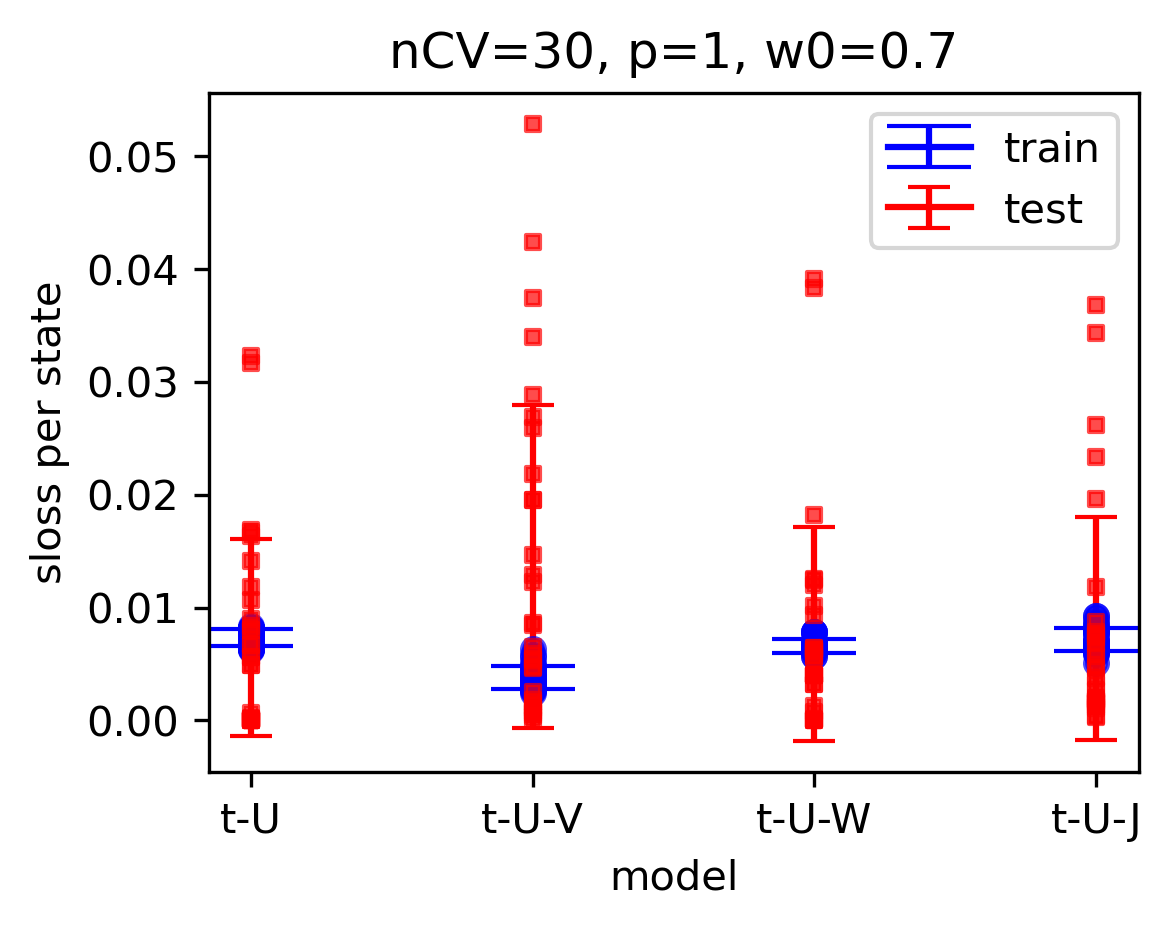

In [8]:
model_names = ['t-U', 't-U-V', 't-U-W', 't-U-J']
model_files = [tU_CV, tUV_CV, tUW_CV, tUJ_CV]

plot_loss_scatter('sloss', model_names, model_files)
plt.title('nCV=30, p=1, w0=0.7')

#plt.ylim(0, 0.2)

plt.savefig("sloss2_CV.png", bbox_inches="tight")

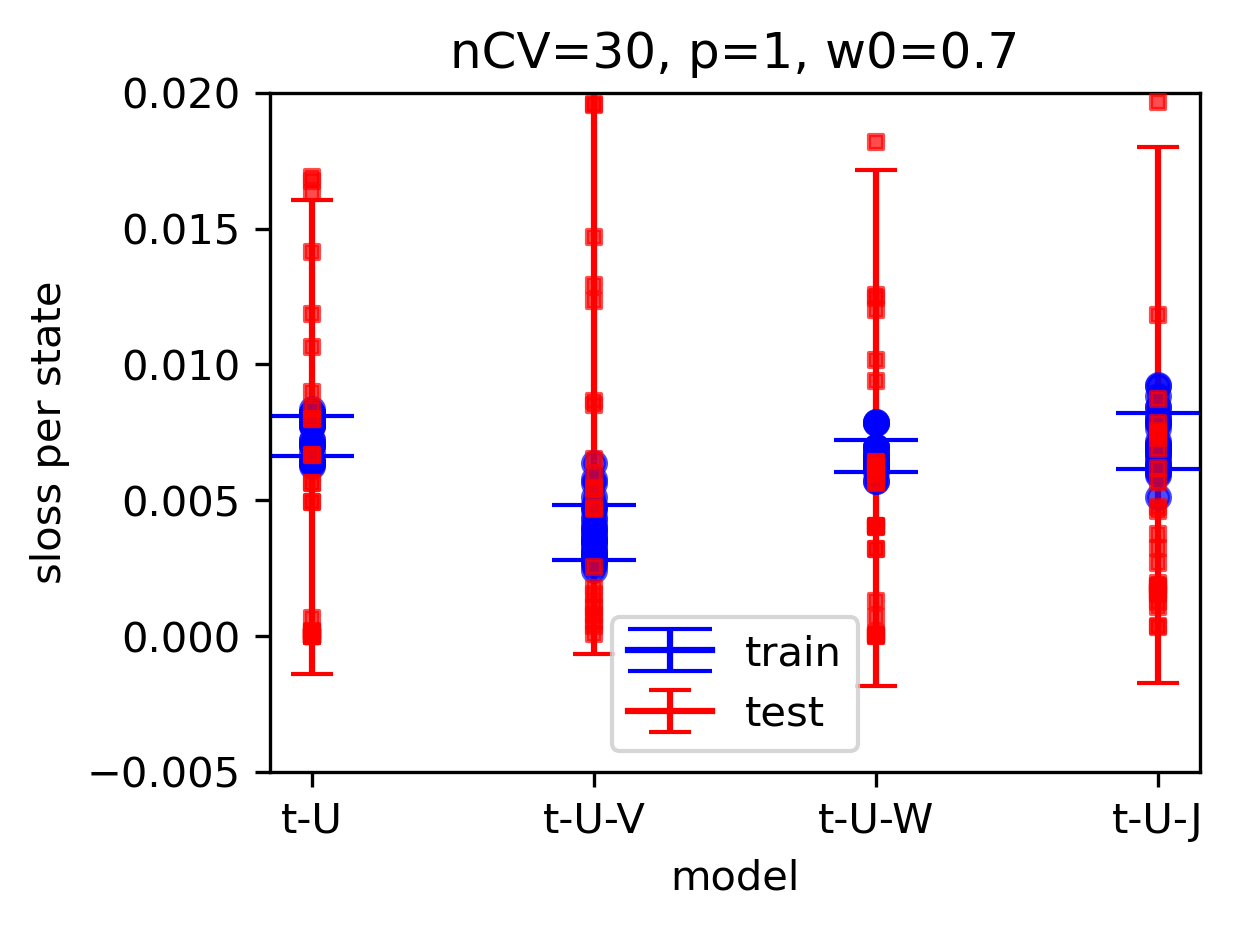

In [9]:
model_names = ['t-U', 't-U-V', 't-U-W', 't-U-J']
model_files = [tU_CV, tUV_CV, tUW_CV, tUJ_CV]


plot_loss_scatter('sloss', model_names, model_files)
plt.ylim(-0.005, 0.02)
plt.title('nCV=30, p=1, w0=0.7')
plt.savefig("sloss2_CV_zoomed.png", bbox_inches="tight")

In [10]:
def plot_parameters(param_name:str, model_names, model_files):
    # Should source the model_names from the model_files
    plt.figure(figsize=(4,3), dpi=300)

    for i, model_name in enumerate(model_names):
        N = len(model_files[i][f'rdmd_params/{param_name}'])
        plt.errorbar(model_name, model_files[i][f'rdmd_params/{param_name}'].mean(), model_files[i][f'rdmd_params/{param_name}'].std(), c='b', label='train' if i ==0  else '', capsize=10.0)

        plt.scatter([model_name]*N, model_files[i][f'rdmd_params/{param_name}'], c='b', s=30, alpha=0.7, zorder=10)

    plt.legend()

    plt.ylabel(param_name + ' (Ha)')
    plt.xlabel('model')

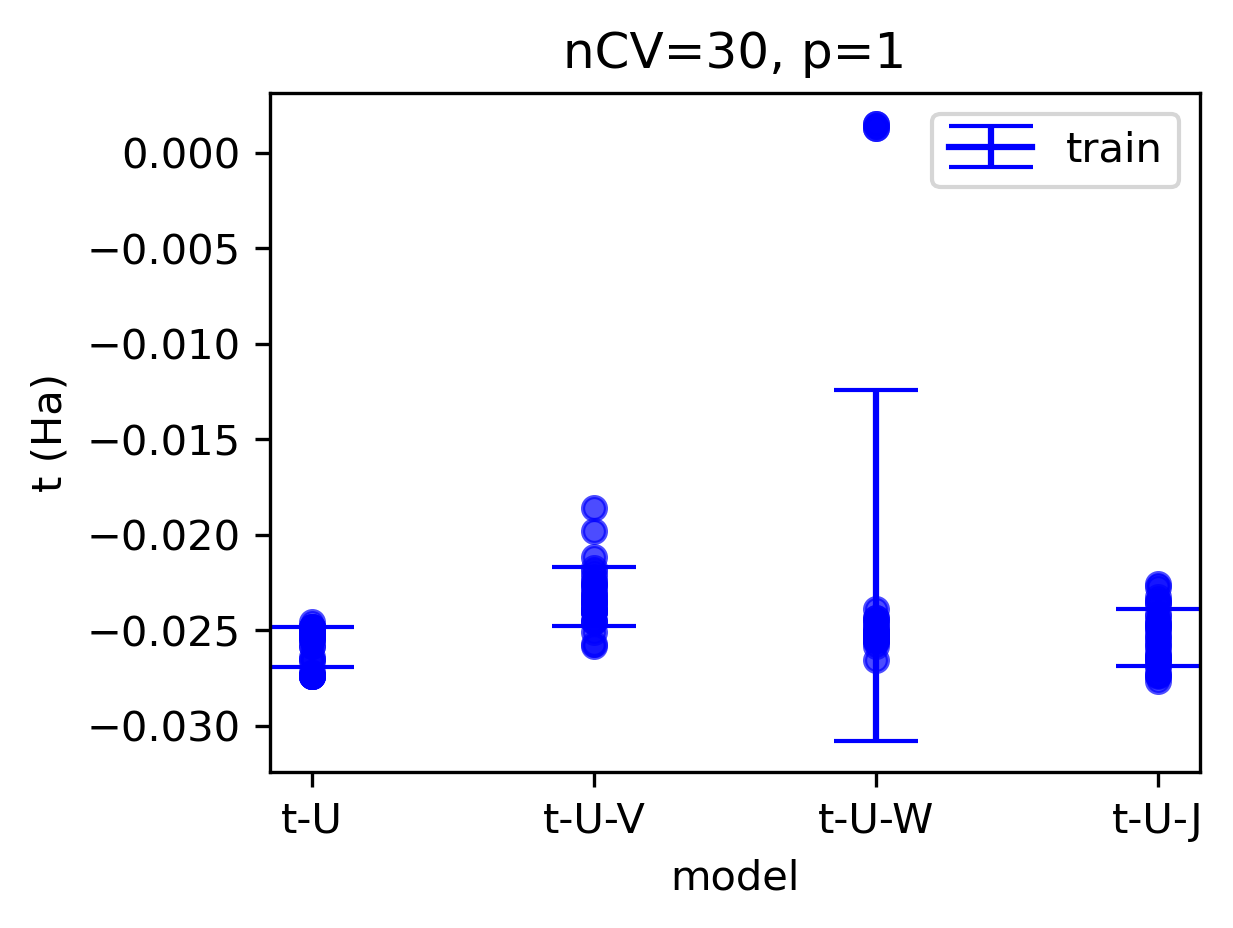

In [11]:
plot_parameters('t', model_names, model_files)
plt.title('nCV=30, p=1')
plt.savefig("param_t_CV.png", bbox_inches="tight")

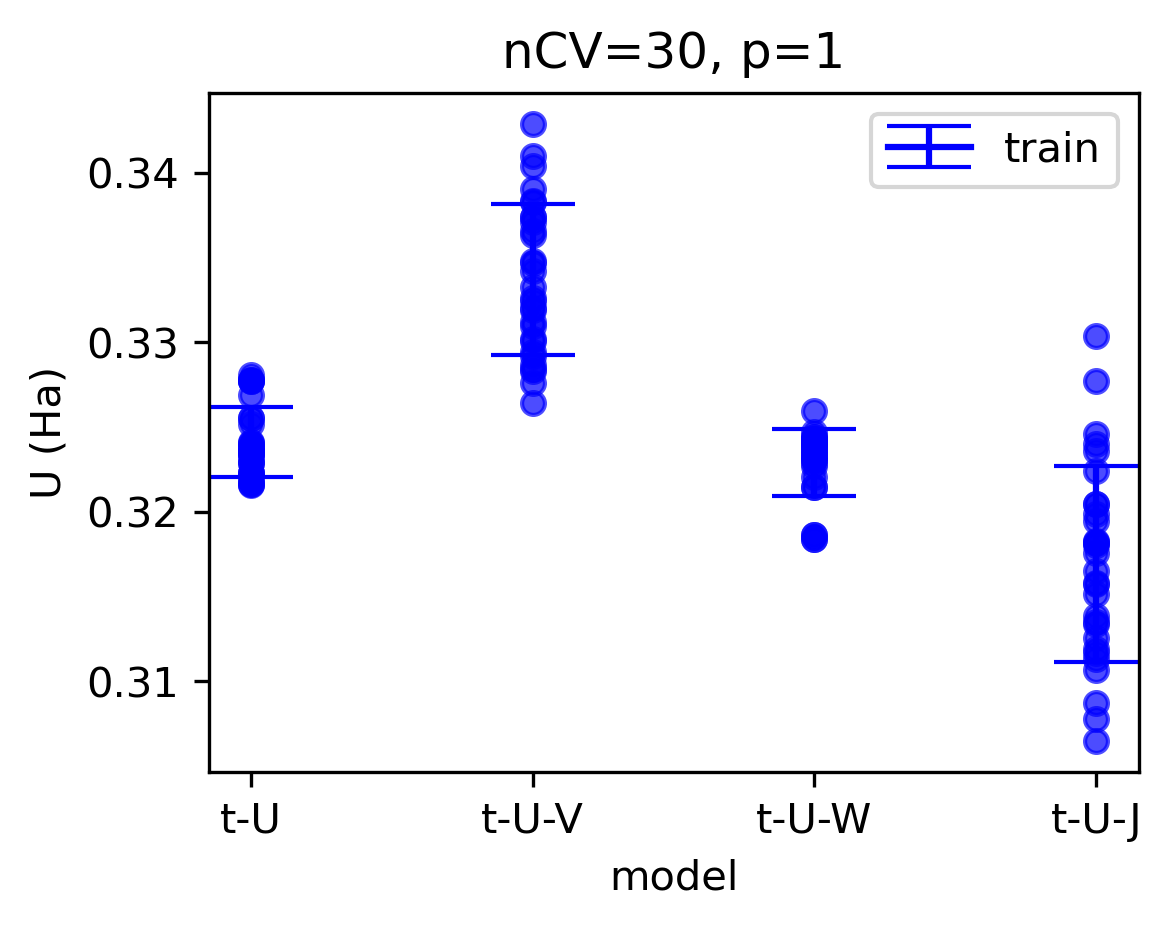

In [12]:
plot_parameters('U', model_names, model_files)
plt.title('nCV=30, p=1')
plt.savefig("param_U_CV.png", bbox_inches="tight")

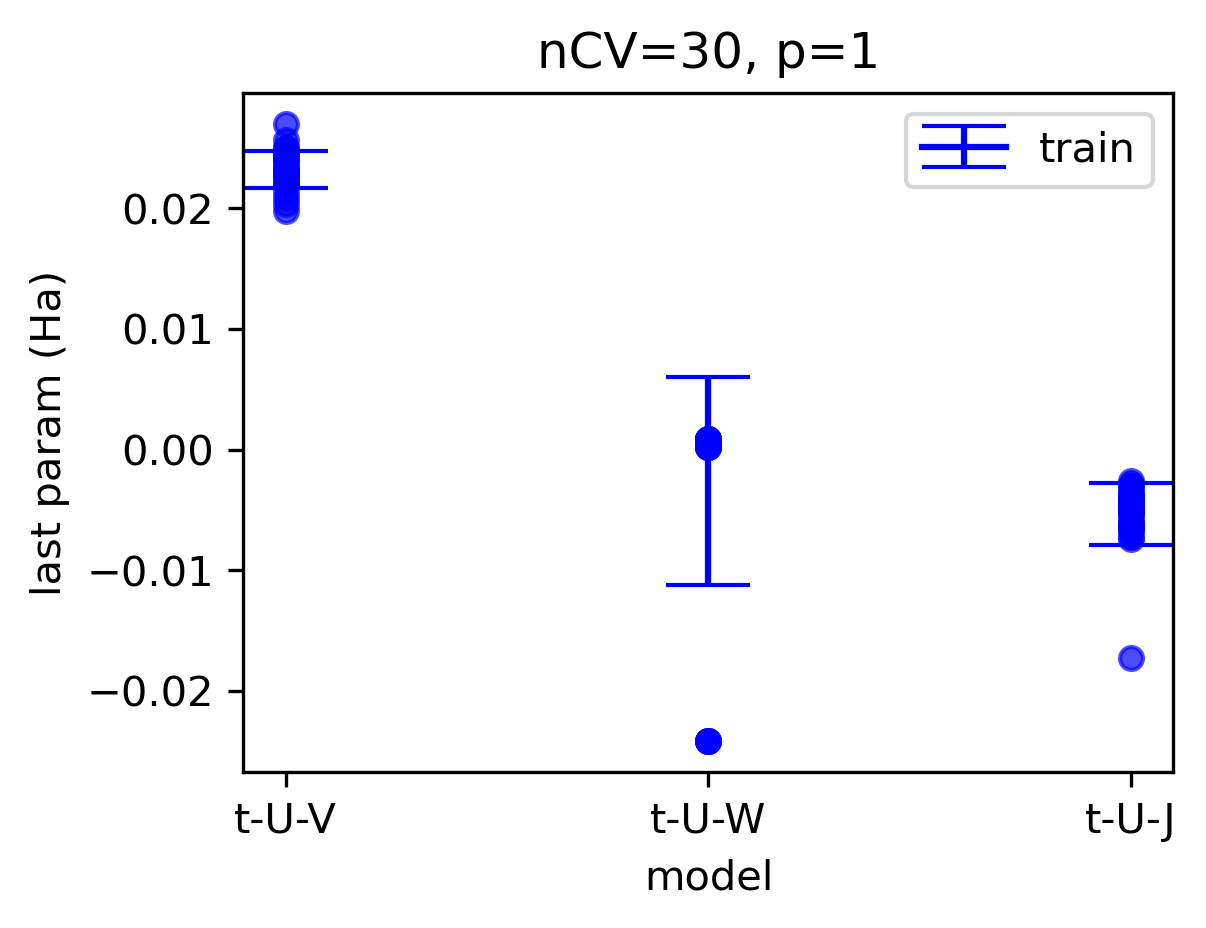

In [13]:
plt.figure(figsize=(4,3), dpi=300, facecolor="white")

N=30
param_name = 'V'
plt.errorbar(f't-U-{param_name}', tUV_CV[f'rdmd_params/{param_name}'].mean(), tUV_CV[f'rdmd_params/{param_name}'].std(), c='b', label='train', capsize=10.0)
plt.scatter([f't-U-{param_name}']*N, tUV_CV[f'rdmd_params/{param_name}'], c='b', s=30, alpha=0.7, zorder=10)


param_name = 'W'
plt.errorbar(f't-U-{param_name}', tUW_CV['rdmd_params/ni_hop'].mean(), tUW_CV['rdmd_params/ni_hop'].std(), c='b', capsize=10.0)
plt.scatter([f't-U-{param_name}']*N, tUW_CV['rdmd_params/ni_hop'], c='b', s=30, alpha=0.7, zorder=10)


param_name = 'J'
plt.errorbar(f't-U-{param_name}', tUJ_CV[f'rdmd_params/{param_name}'].mean(), tUJ_CV[f'rdmd_params/{param_name}'].std(), c='b', capsize=10.0)
plt.scatter([f't-U-{param_name}']*N, tUJ_CV[f'rdmd_params/{param_name}'], c='b', s=30, alpha=0.7, zorder=10)


plt.legend()

plt.ylabel('last param (Ha)')
plt.xlabel('model')
plt.title('nCV=30, p=1')
plt.savefig("param_param_CV.png", bbox_inches="tight")

## BIC 

In [23]:
k = 2
BIC_tU = k*np.log(2) - 2*np.log(tU_CV['train/loss'])

k = 3
BIC_tUV = k*np.log(2) - 2*np.log(tUV_CV['train/loss'])
BIC_tUW = k*np.log(2) - 2*np.log(tUW_CV['train/loss'])
BIC_tUJ = k*np.log(2) - 2*np.log(tUJ_CV['train/loss'])

Text(0.5, 0, 'model')

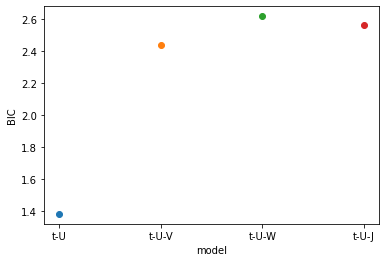

In [25]:
plt.scatter('t-U', np.mean(BIC_tU))
plt.scatter('t-U-V', np.mean(BIC_tUV))
plt.scatter('t-U-W', np.mean(BIC_tUW))
plt.scatter('t-U-J', np.mean(BIC_tUJ))

plt.ylabel('BIC')
plt.xlabel('model')